Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Summary Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.0

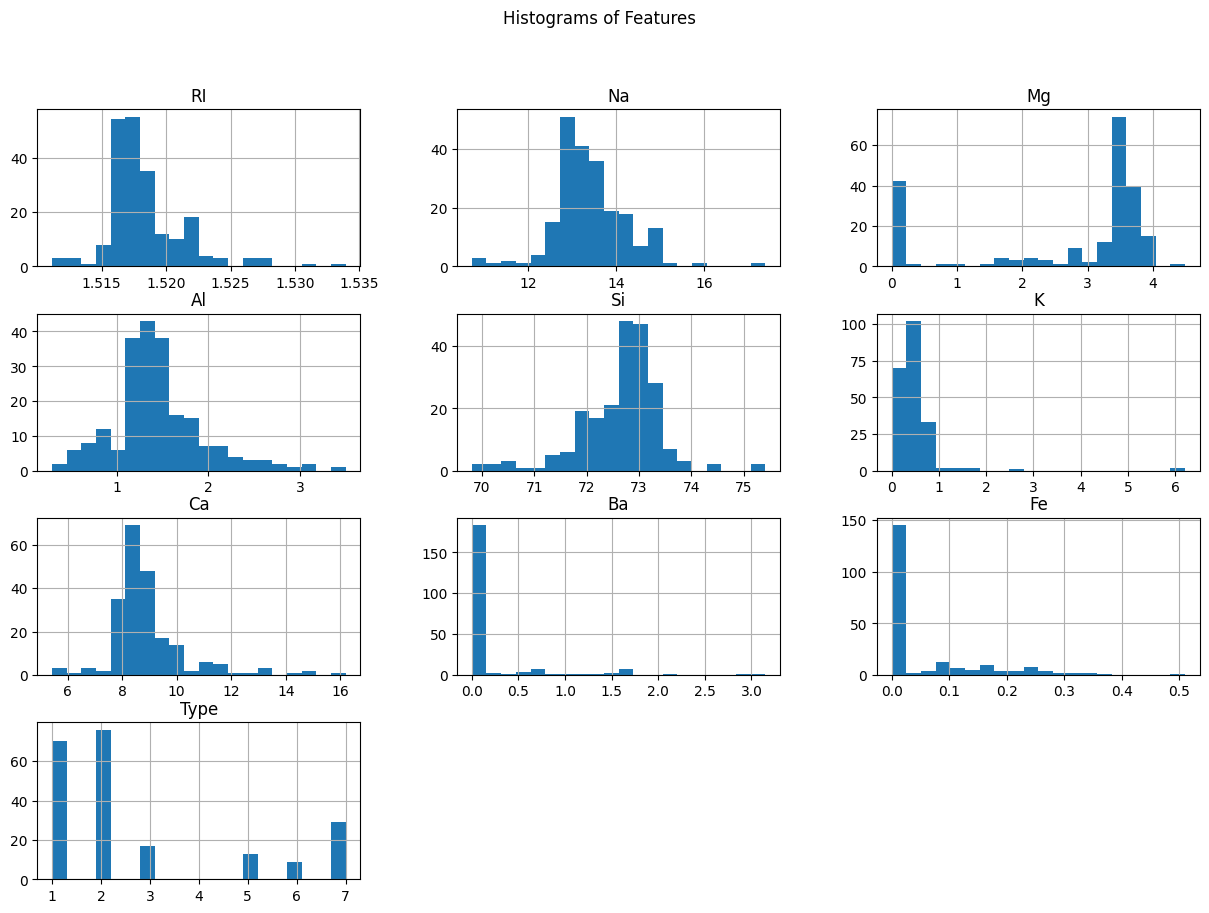

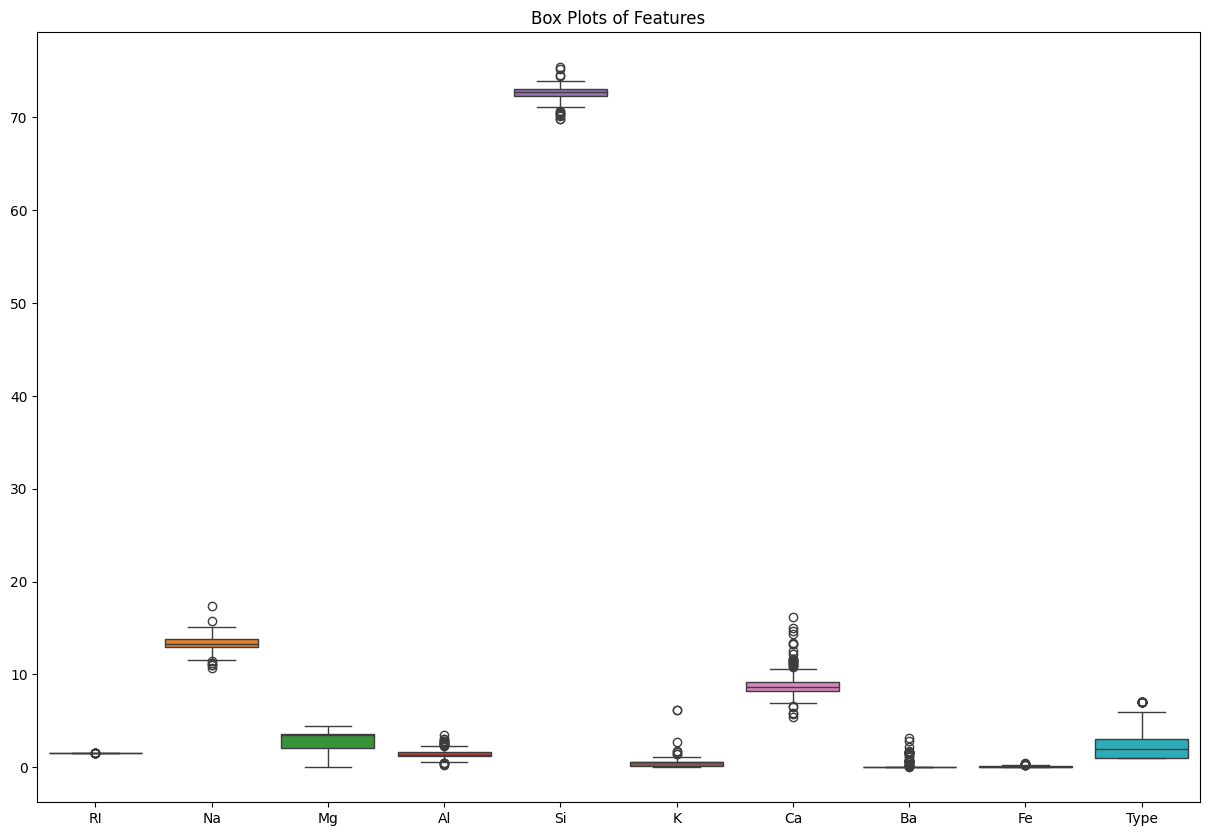

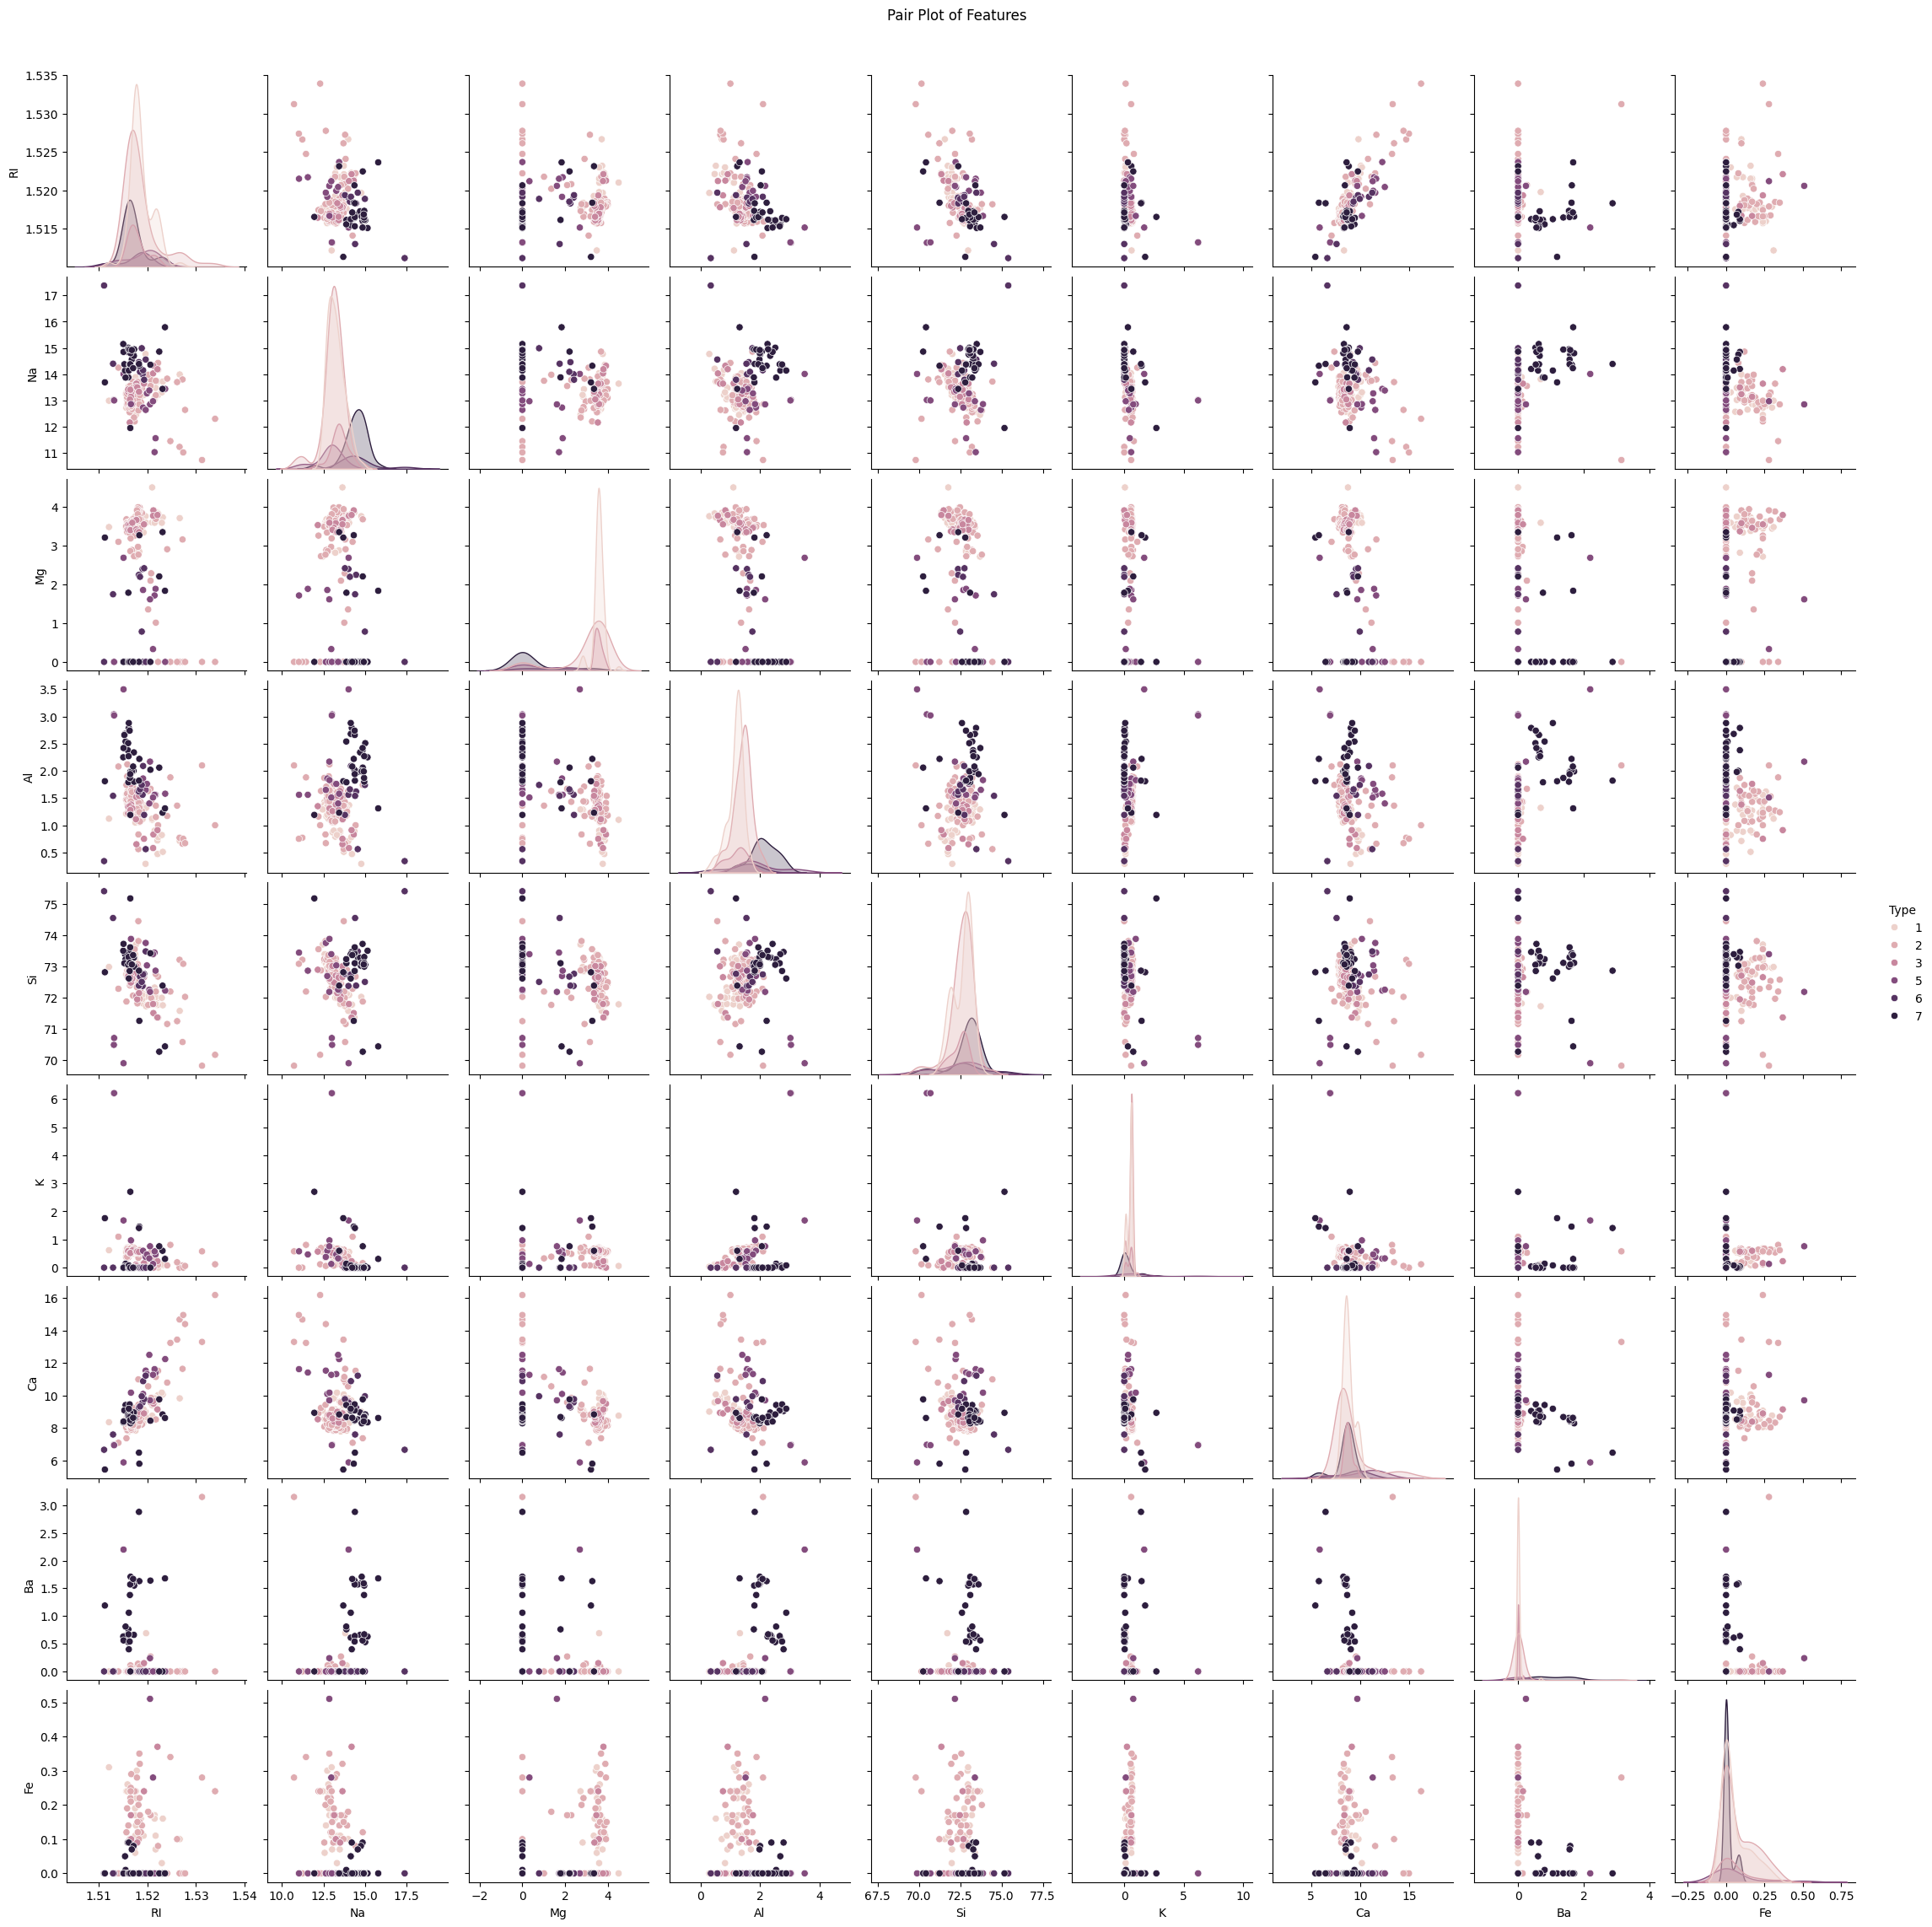


Random Forest Metrics:
Accuracy: 0.7692307692307693
Precision: 0.7661700618222356
Recall: 0.7692307692307693
F1-Score: 0.7601294829201807

Bagging Metrics:
Accuracy: 0.7230769230769231
Precision: 0.706073556073556
Recall: 0.7230769230769231
F1-Score: 0.6915113871635611

AdaBoost Metrics:
Accuracy: 0.7384615384615385
Precision: 0.7840659340659341
Recall: 0.7384615384615385
F1-Score: 0.7338489729755127

Comparison of Models:
           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.769231   0.766170  0.769231  0.760129
1        Bagging  0.723077   0.706074  0.723077  0.691511
2       AdaBoost  0.738462   0.784066  0.738462  0.733849


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'glass.xlsx'
glass_data = pd.read_excel(file_path, sheet_name='glass')

# 1. Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(glass_data.info())
print("\nSummary Statistics:")
print(glass_data.describe())
print("\nMissing Values:")
print(glass_data.isnull().sum())

# 2. Data Visualization
# Histograms for each feature
glass_data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

# Box plots for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=glass_data)
plt.title('Box Plots of Features')
plt.show()

# Pair plot to visualize relationships
sns.pairplot(glass_data, hue='Type')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# 3. Data Preprocessing
# Check for missing values
if glass_data.isnull().sum().any():
    imputer = SimpleImputer(strategy='mean')
    glass_data = pd.DataFrame(imputer.fit_transform(glass_data), columns=glass_data.columns)

# No categorical variables to encode in this dataset

# Feature scaling
scaler = StandardScaler()
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']
X_scaled = scaler.fit_transform(X)

# 4. Random Forest Model Implementation
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted')}")

# 5. Bagging and Boosting Methods
# Bagging Classifier
bag_clf = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=10), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

print("\nBagging Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bag)}")
print(f"Precision: {precision_score(y_test, y_pred_bag, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_bag, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_bag, average='weighted')}")

# Boosting Classifier (AdaBoost)
ada_clf = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=10), n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

print("\nAdaBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"Precision: {precision_score(y_test, y_pred_ada, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_ada, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_ada, average='weighted')}")

# Comparison of results
results = {
    'Model': ['Random Forest', 'Bagging', 'AdaBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_bag), accuracy_score(y_test, y_pred_ada)],
    'Precision': [precision_score(y_test, y_pred_rf, average='weighted'), precision_score(y_test, y_pred_bag, average='weighted'), precision_score(y_test, y_pred_ada, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_rf, average='weighted'), recall_score(y_test, y_pred_bag, average='weighted'), recall_score(y_test, y_pred_ada, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_bag, average='weighted'), f1_score(y_test, y_pred_ada, average='weighted')]
}

results_df = pd.DataFrame(results)
print("\nComparison of Models:")
print(results_df)